<a href="https://colab.research.google.com/github/Seanatist/Seanatist/blob/main/SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#let create synthetic data points
from sklearn.datasets import make_classification


In [ ]:
x,y = make_classification (n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class = 2, n_redundant=0)

In [ ]:
x

array([[ 1.70044706,  0.53322484],
       [-1.96520922,  0.37508201],
       [ 0.62079788,  0.12495809],
       ...,
       [-0.5984382 ,  1.34460041],
       [-1.43446727,  2.08046313],
       [-1.64362973, -0.63603347]])

In [ ]:
pd.DataFrame(x)

,0,1
0,1.700447,0.533225
1,-1.965209,0.375082
2,0.620798,0.124958
3,-1.951087,2.362227
4,0.583474,1.143765
...,...,...
995,-0.648776,2.160361
996,-0.499849,-0.840228
997,-0.598438,1.344600
998,-1.434467,2.080463


<Axes: xlabel='0', ylabel='1'>

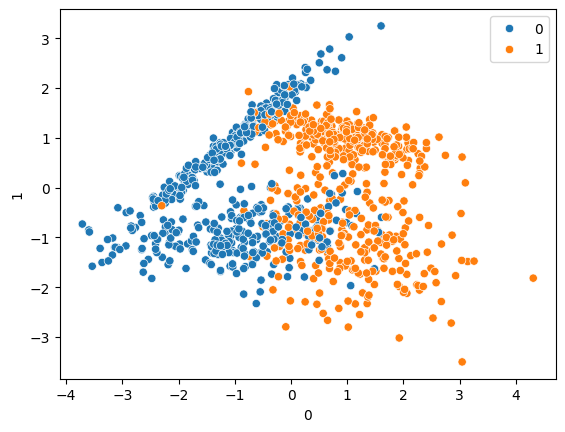

In [ ]:
sns.scatterplot(x=pd.DataFrame(x)[0], y=pd.DataFrame(x)[1], hue=y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state = 10)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(kernel = "linear")

In [ ]:
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
#prediction
y_pred = svc.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       127
           1       0.86      0.82      0.84       123

    accuracy                           0.84       250
   macro avg       0.84      0.84      0.84       250
weighted avg       0.84      0.84      0.84       250

[[110  17]
 [ 22 101]]


In [ ]:
rbf = SVC(kernel = "rbf")

In [ ]:
rbf.fit(x_train, y_train)

SVC()

In [ ]:
#prediction
y_pred = rbf.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       127
           1       0.87      0.88      0.87       123

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250

[[111  16]
 [ 15 108]]


In [ ]:
signoid = SVC(kernel = "poly")
signoid.fit(x_train, y_train)
#prediction
y_pred2 = signoid.predict(x_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       127
           1       0.82      0.89      0.86       123

    accuracy                           0.85       250
   macro avg       0.85      0.85      0.85       250
weighted avg       0.85      0.85      0.85       250



In [ ]:
signoid.intercept_

array([0.21194092])

In [ ]:
from sklearn.model_selection import GridSearchCV

#defining parameter range
param_grid = {'C': [0.1,1,10,100,1000],
             'gamma': [1,0.1,0.01,0.001,0.0001],
             'kernel': ['rbf']}


In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [ ]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.860 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.880 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
##prediction
y_pred4 = grid.predict(x_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       127
           1       0.87      0.88      0.87       123

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250

[[111  16]
 [ 15 108]]


**Svm kernels Indepth Intution and Practical Explanation**


In [81]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(5**2 - x**2)
y = np.hstack((y, -y))
x = np.hstack((x, -x))


In [82]:
x

array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
       -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909,
       -3.98989899, -3.88888889, -3.78787879, -3.68686869, -3.58585859,
       -3.48484848, -3.38383838, -3.28282828, -3.18181818, -3.08080808,
       -2.97979798, -2.87878788, -2.77777778, -2.67676768, -2.57575758,
       -2.47474747, -2.37373737, -2.27272727, -2.17171717, -2.07070707,
       -1.96969697, -1.86868687, -1.76767677, -1.66666667, -1.56565657,
       -1.46464646, -1.36363636, -1.26262626, -1.16161616, -1.06060606,
       -0.95959596, -0.85858586, -0.75757576, -0.65656566, -0.55555556,
       -0.45454545, -0.35353535, -0.25252525, -0.15151515, -0.05050505,
        0.05050505,  0.15151515,  0.25252525,  0.35353535,  0.45454545,
        0.55555556,  0.65656566,  0.75757576,  0.85858586,  0.95959596,
        1.06060606,  1.16161616,  1.26262626,  1.36363636,  1.46464646,
        1.56565657,  1.66666667,  1.76767677,  1.86868687,  1.96

In [83]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1 = np.hstack((y1, -y1))
x1 = np.hstack((x1, -x1))

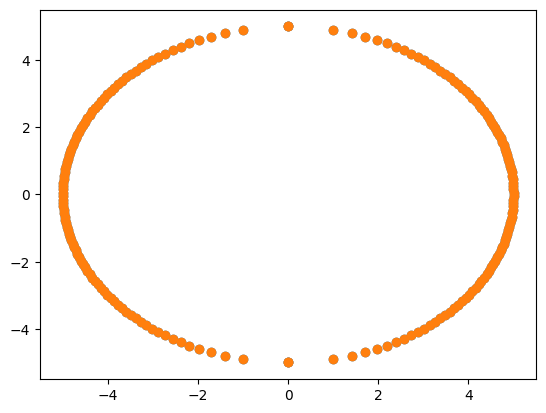

In [84]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [85]:
np.vstack([y,x]).T

array([[ 0.        , -5.        ],
       [ 0.99994898, -4.8989899 ],
       [ 1.40690791, -4.7979798 ],
       [ 1.71419826, -4.6969697 ],
       [ 1.96904936, -4.5959596 ],
       [ 2.18984681, -4.49494949],
       [ 2.38606299, -4.39393939],
       [ 2.563349  , -4.29292929],
       [ 2.72540153, -4.19191919],
       [ 2.87479787, -4.09090909],
       [ 3.01342099, -3.98989899],
       [ 3.14269681, -3.88888889],
       [ 3.26373625, -3.78787879],
       [ 3.37742495, -3.68686869],
       [ 3.48448249, -3.58585859],
       [ 3.5855029 , -3.48484848],
       [ 3.68098326, -3.38383838],
       [ 3.77134438, -3.28282828],
       [ 3.85694608, -3.18181818],
       [ 3.93809873, -3.08080808],
       [ 4.0150721 , -2.97979798],
       [ 4.08810229, -2.87878788],
       [ 4.1573971 , -2.77777778],
       [ 4.2231404 , -2.67676768],
       [ 4.28549564, -2.57575758],
       [ 4.34460872, -2.47474747],
       [ 4.40061029, -2.37373737],
       [ 4.45361771, -2.27272727],
       [ 4.50373673,

In [89]:
import pandas as pd
df1 = pd.DataFrame(np.vstack([y,x]).T, columns = ["x1","x2"])
df1["Y"] = 0
df2 = pd.DataFrame(np.vstack([y1,x1]).T, columns = ["x1","x2"])
df2["Y"] = 1
df = pd.concat([df1, df2], ignore_index=True)
df.head(5)


,x1,x2,Y
0,0.000000,-5.00000,0
1,0.999949,-4.89899,0
2,1.406908,-4.79798,0
3,1.714198,-4.69697,0
4,1.969049,-4.59596,0


In [90]:
#independent and dependent features
x = df.iloc[:, :2]
y = df.Y

In [91]:
y

,Y
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,1


In [92]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state = 10)

In [93]:
y_train

,Y
57,0
87,0
357,1
355,1
238,1
...,...
369,1
320,1
15,0
125,0


**Polynomial Kernel**


In [99]:
df["x1_square"] = df["x1"]**2
df["x2_square"] = df["x2"]**2
df["x1*x2"] = df["x1"]*df["x2"]
df.head()

,x1,x2,Y,x1_square,x2_square,x1*x2
0,0.000000,-5.00000,0,0.000000,25.000000,-0.000000
1,0.999949,-4.89899,0,0.999898,24.000102,-4.898740
2,1.406908,-4.79798,0,1.979390,23.020610,-6.750316
3,1.714198,-4.69697,0,2.938476,22.061524,-8.051537
4,1.969049,-4.59596,0,3.877155,21.122845,-9.049671


In [100]:
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.25,random_state = 0)

In [101]:
x_train

,x1,x2
250,4.999745,0.050505
63,4.810457,1.363636
312,-3.263736,3.787879
159,-4.907054,-0.959596
283,3.680983,3.383838
...,...,...
323,-4.223140,2.676768
192,-2.563349,-4.292929
117,-3.771344,3.282828
47,4.993619,-0.252525


In [103]:
import plotly.express as px
fig = px.scatter_3d(df, x='x1', y='x2', z='x1*x2',
              color='Y')
fig.show()

In [104]:
fig = px.scatter_3d(df, x='x1_square', y='x2_square', z='x1*x2',
              color='Y')
fig.show()

In [106]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel = 'poly')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.46

In [107]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel = 'rbf')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.4

In [108]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel = 'sigmoid')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.43